#  Airbnb activities is Seattle
 
The intention of this project is to find out answers to following questions:

1. How do prices influence amount of bookings?

2. In which areas are the most accomodations located? (neighbourhood)

3. Which accomodations have the best review_scores and how do they go together with bookings?

## Import project libraries

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# configures Pandas to adopt the behavior planned for future releases, where automatic and silent data type downcasting 
# (converting data types to a smaller or more efficient type without explicit instruction) is disabled.
pd.set_option('future.no_silent_downcasting', True)

In [85]:
pip freeze > requirements.txt

about-time==4.2.1
absl-py==2.0.0
accelerate==0.23.0
adodbapi==2.6.1.3
affine==2.3.1
aiofiles==23.2.1
aiohttp==3.9.3
aiosignal==1.3.1
aiosqlite==0.20.0
alabaster==0.7.13
alembic==1.12.1
alive-progress==3.1.5
altair==5.2.0
altair-data-server==0.4.1
altair-transform==0.2.0
aniso8601==9.0.1
annotated-types==0.6.0
ansi2html==1.9.1
anyio==4.3.0
anywidget==0.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_api_compat==1.4.1
arrow==1.2.2
asciitree==0.3.3
asgi-csrf==0.9
asgiref==3.7.2
asn1crypto==1.5.1
asteval==0.9.31
astroid==3.1.0
astropy==5.3.4
asttokens==2.4.1
async-lru==2.0.4
async-timeout==4.0.3
atomicwrites==1.4.0
attrs==23.2.0
autograd==1.6.2
autopep8==2.0.4
azure-core==1.29.5
azure-cosmos==4.5.1
azure-identity==1.15.0
Babel==2.13.1
baresql==0.8.0
bcrypt==4.0.1
beautifulsoup4==4.12.2
binaryornot==0.4.4
black==24.2.0
bleach==6.0.0
blinker==1.7.0
bokeh==3.4.0
botorch==0.9.5
branca==0.6.0
brewer2mpl==1.4.1
Brotli==1.1.0
build==1.1.1
cachelib==0.10.2
cachetools==5.3

## Funktions

In [61]:
def print_picture(pic_kind):
    '''
    This function prints out the results of the analyzes as a picture

    Input:
        pic_kind as String: defines the kind of picture which needs to be printed

    Output:
        plt picture as defined via Input parameter
    '''
    if pic_kind == 'booking_vs_prices':
        plt.figure(figsize=(10, 6))
        plt.scatter(df_merged['price_category'], df_merged['booked'], color='blue', )
        plt.xticks(rotation=45)
        plt.xlabel('Price_category')
        plt.ylabel('Number of Bookings')
        plt.title('Scatter Plot: bookings vs prices')
    elif pic_kind == 'distribution_of_accomodations':
        plt.figure(figsize=(8, 6))
        plt.pie(df_neighbourhood_counts['id'], labels=df_neighbourhood_counts.index, autopct='%1.1f%%', startangle=140)
        # Add a title
        plt.title('Distribution of Accomodations by Neighbourhood')
    elif pic_kind == 'rating_vs_bookings':
        plt.figure(figsize=(10, 6))
        plt.scatter(df_merged_2['review_scores_rating'], df_merged_2['booked'], color='blue')
        plt.xlabel('Rating')
        plt.ylabel('Number of Bookings')
        plt.title('Scatter Plot: Rating vs Number of Bookings')
    else: print('Wrong pic_kind')

    # Save the plot to a file
    plt.savefig(pic_kind+'.png')
    
    return plt.show()

## Read data

In [62]:
s_calendar = 'Seattle/calendar.csv'
s_reviews = 'Seattle/reviews.csv'
s_listings = 'Seattle/listings.csv'

df_s_calendar = pd.read_csv(s_calendar)
df_s_reviews = pd.read_csv(s_reviews)
df_s_listings = pd.read_csv(s_listings)

## Data Exploration

In [63]:
df_s_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [64]:
df_s_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [65]:
df_s_listings .head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [66]:
# just show columnnames of listings
df_s_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

## Missing values

In [67]:
df_s_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [68]:
df_s_reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [69]:
df_s_listings.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [70]:
# show only those columns which contain empty cells
df_s_listings.isnull().sum()[lambda x: x > 0]

summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_verifications                2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                     1
bathrooms                   

**CONCLUSION**

**df_s_calendar** dataset has some missing values in the column 'price'. The missing values in this column mean that those accomodations are not booked on certain days. This is a good indicator vor availability of an accomodation, which we can use later in our analyzes. For that reason we can leave this data as it is.

**df_s_reviews** has some missing values in the column 'comments'. In this case we have to accept data as it is, since we cannot force our customer to create a review content. However, we should discuss that point in order to find a way to motivate our customers for doing this.

**df_s_listings** contains quite a lot of missing data. However, since we are not going to use all of this data, we will leave it as it is at this stage and deal with it later in the data analysis phase, once a decision is made about which data is needed.

## 1.How do prices influence amounts of bookings?

### Data analyze

In [71]:
# replace 'available' colum values with boolean values
df_s_calendar['available'] = df_s_calendar['available'].replace({'t': True, 'f': False})
df_s_calendar#.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,$85.00
1,241032,2016-01-05,True,$85.00
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,False,NaN
1393566,10208623,2016-12-30,False,NaN
1393567,10208623,2016-12-31,False,NaN
1393568,10208623,2017-01-01,False,NaN


In [72]:
# compare booked vs. non-booked values

# count number of availabe(non-booked) entries per listing_id as well as total amount of entries per listing_id
df_grouped = df_s_calendar.groupby('listing_id')['available'].agg(['sum', 'count'])
df_grouped = df_grouped.rename(columns={'sum': 'non_booked', 'count': 'entries_per_listing_id'})
print(df_grouped.head())

# calculate number of not avalable (booked) entries per listing_id
df_grouped['booked'] = df_grouped['entries_per_listing_id'] - df_grouped['non_booked']

df_sorted = df_grouped.sort_values(by='booked', ascending=False)
df_sorted


           non_booked  entries_per_listing_id
listing_id                                   
3335              309                     365
4291              365                     365
5682              309                     365
6606              365                     365
7369               53                     365


,non_booked,entries_per_listing_id,booked
listing_id,,,
5308339,0,365,365
4211836,0,365,365
9939359,0,365,365
2426152,0,365,365
4030600,0,365,365
...,...,...,...
3720731,365,365,0
3726391,365,365,0
1317919,365,365,0


In [73]:
# select features
selected_featues = ['id', 'price']
df = df_s_listings[selected_featues]
'''
Using copy(): If you’re working with a DataFrame that is a slice of another DataFrame, it’s a good practice 
to use df = df.copy() before making modifications. This ensures you are working with a separate copy.
'''
df = df.copy()

In [74]:
# check whether NaN values exist in the column
df['price'].isnull().any()  

False

In [75]:
type(df['price'][0])

# create prise_int column

df['price_short'] = df['price'].apply(lambda x: x[1:-3])
df['price_short'] = df['price_short'].str.replace(',', '').astype(int)
df

,id,price,price_short
0,241032,$85.00,85
1,953595,$150.00,150
2,3308979,$975.00,975
3,7421966,$100.00,100
4,278830,$450.00,450
...,...,...,...
3813,8101950,$359.00,359
3814,8902327,$79.00,79
3815,10267360,$93.00,93
3816,9604740,$99.00,99


In [76]:
type(df['price_short'][0])

# create price_category column

#Define the bins and labels for price categories

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, float('inf')]  # Define the ranges
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '501-550', '551-600', '601-650', '651+']

# Create the price_category column
df['price_category'] = pd.cut(df['price_short'], bins=bins, labels=labels, right=False)
df

,id,price,price_short,price_category
0,241032,$85.00,85,51-100
1,953595,$150.00,150,151-200
2,3308979,$975.00,975,651+
3,7421966,$100.00,100,101-150
4,278830,$450.00,450,451-500
...,...,...,...,...
3813,8101950,$359.00,359,351-400
3814,8902327,$79.00,79,51-100
3815,10267360,$93.00,93,51-100
3816,9604740,$99.00,99,51-100


In [77]:
# Combine bookings with listings features
'''
When using pd.merge, it is generally not necessary to create a copy of the DataFrames before merging, 
as the merge function itself creates a new DataFrame. The original DataFrames remain unchanged after the merge operation.
'''
#df_merged = pd.merge(df_left, df_right, left_on='key_left', right_on='key_right', how='left')

df_merged = pd.merge(df_sorted, df, left_on='listing_id', right_on='id').sort_values('price_short')

df_merged

,non_booked,entries_per_listing_id,booked,id,price,price_short,price_category
2548,351,365,14,10310373,$20.00,20,0-50
303,34,365,331,10248139,$22.00,22,0-50
1940,312,365,53,7411863,$25.00,25,0-50
358,47,365,318,10012724,$25.00,25,0-50
2746,357,365,8,4701205,$25.00,25,0-50
...,...,...,...,...,...,...,...
2995,362,365,3,4464824,$899.00,899,651+
3629,365,365,0,2720963,$950.00,950,651+
1471,220,365,145,3308979,$975.00,975,651+
46,0,365,365,3345341,$999.00,999,651+


### Visualization

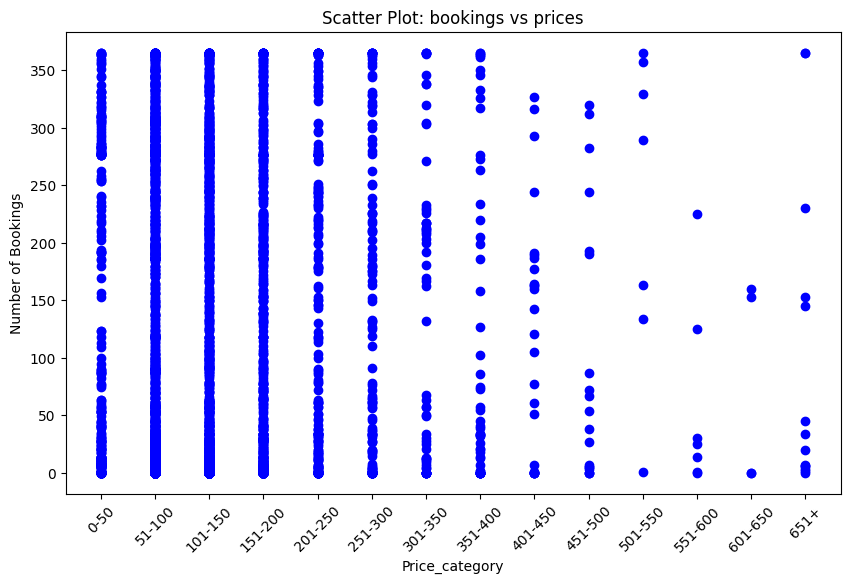

In [78]:
print_picture('booking_vs_prices')

### **CONCLUSION**

The first step of the project helps to understand the customer group and to find out in which apartments customers are most interested. What attracts them the most: the cheaper prices or the quality of the apartments (even though the prices might be a bit higher)?

It has been found that the most attractive apartments cost between $50 and $200 and do not belong to the exclusive group of apartments. They are not at the cheapest level but rather belong to the lower price range. This means that people paying for $50-$200 apartments are the main group of customers.

Starting at $200 and upwards, the number of bookings decreases with each price increase and becomes very rare for the most expensive ones.

It was interesting to realize that the cheapest accommodations (up to $50) are also frequently used, though not as often as those in the main customer group.

## 2. In which areas are the most accomodations located? (neighbourhood)

### Data analyze

In [79]:
df_listings_areas = df_s_listings[['neighbourhood', 'id']].groupby('neighbourhood').agg('count').sort_values('id')
df_listings_areas

,id
neighbourhood,
North College Park,1
Roxhill,1
Fairmount Park,1
Pike Market,2
South Park,2
...,...
Queen Anne,187
Minor,192
Belltown,204


In [80]:
# select listings most concentrated in certain neighbourhoods
df_neighbourhood_counts = df_listings_areas[df_listings_areas['id'] > 100]
df_neighbourhood_counts

,id
neighbourhood,
First Hill,105
University District,107
Wallingford,143
Fremont,148
Queen Anne,187
Minor,192
Belltown,204
Ballard,213
Capitol Hill,351


### Visualization

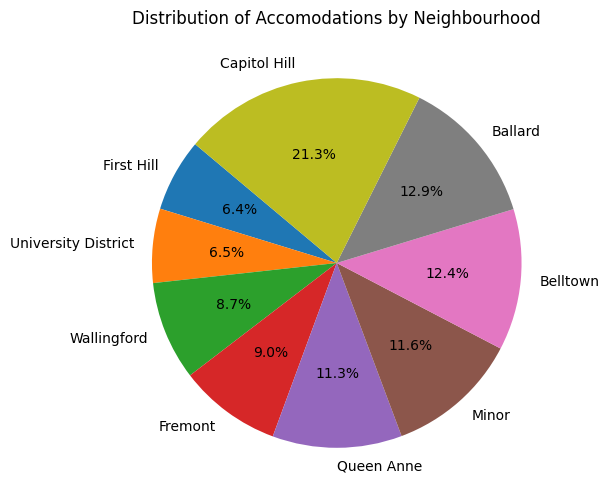

In [81]:
print_picture('distribution_of_accomodations')

## **CONCLUSION**

For people who are traveling, it might be of interest to know where the most accommodations are located.

This might be an indicator of the most attractive neighborhoods. On the other hand, it might be easier to find a place to stay in an area with a high number of accommodation options.

It has been realized that the most accommodations are in Capitol Hill (21.3%), followed by Ballard (12.9%), Belltown (12.4%), Minor (11.6%), and Queen Anne (11.3%).

The proportion of remaining neighborhoods (Fircrest, Wallingford, University District, and First Hill) is below 10% and does not provide as many options as the others.

## 3. Which accomodations have the best review_scores and how do they go together with bookings.

### Data analyze

In [82]:
# read listings_review scored
df_ratings = df_s_listings[['id', 'review_scores_rating']].dropna().sort_values('review_scores_rating', ascending=False)
df_ratings


,id,review_scores_rating
1892,3402376,100.0
1765,6002165,100.0
1801,7499506,100.0
1799,3124961,100.0
1792,7563243,100.0
...,...,...
1162,9151865,40.0
2320,8474294,40.0
1666,9151374,40.0
3148,5639238,40.0


In [83]:
#df_ratings_bookings = pd.merge(df_ratings, df, left_on='id', right_on='id').sort_values('review_scores_rating')
#df_ratings_bookings
df_merged_2 = pd.merge(df_merged, df_ratings, left_on='id', right_on='id').sort_values('review_scores_rating')
df_merged_2

,non_booked,entries_per_listing_id,booked,id,price,price_short,price_category,review_scores_rating
2136,57,365,308,9183838,$130.00,130,101-150,20.0
1762,270,365,95,5639238,$110.00,110,101-150,40.0
1013,8,365,357,8474294,$81.00,81,51-100,40.0
1655,332,365,33,9151374,$105.00,105,101-150,40.0
845,66,365,299,9151865,$75.00,75,51-100,40.0
...,...,...,...,...,...,...,...,...
1753,179,365,186,6558980,$110.00,110,101-150,100.0
1748,364,365,1,2158992,$110.00,110,101-150,100.0
1730,359,365,6,8153673,$110.00,110,101-150,100.0
1321,288,365,77,9866984,$95.00,95,51-100,100.0


### Visualization

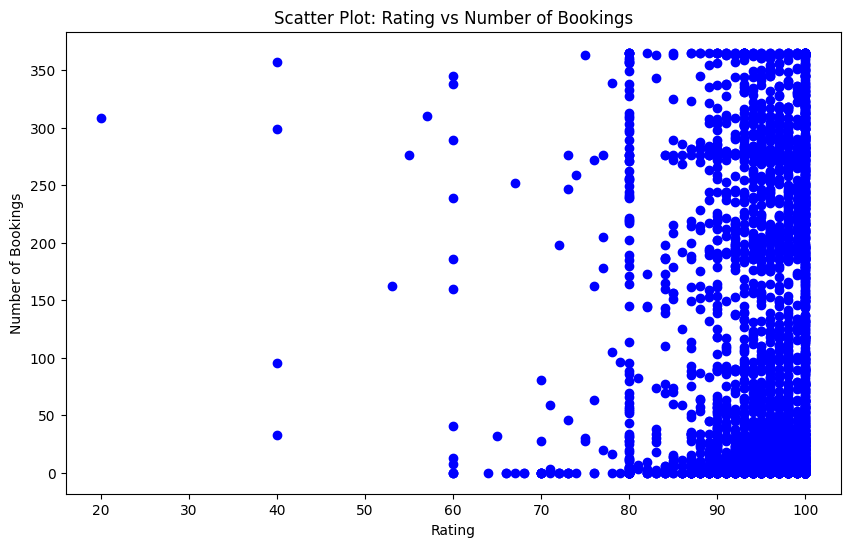

In [84]:
print_picture('rating_vs_bookings')

## **CONCLUSION**

Another question we were interested in was whether the review scores of the accommodations influence the number of their bookings.

And indeed, as expected, the higher the ratings of the accommodations, the higher the number of their bookings.

This emphasizes the critical role of customer satisfaction and the value of their feedback in influencing future bookings and overall success.